In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

df = pd.read_pickle("click_stream_random_1k.pkl")
orders = pd.read_csv('../data/JD_order_data.csv')
users = orders.user_ID
users = users.unique()

In [170]:
usrs = df.sort_values(by='click_len').user.to_numpy()

In [201]:
trial_set = list(usrs[:100]) + list(usrs[400:500]) + list(usrs[850:950])

In [223]:
trial_set_longer = list(usrs[500:])

In [281]:
trial_set_med = list(usrs[400:500]) + list(usrs[750:850])

In [338]:
time.ctime()

'Sat Jan 25 20:55:52 2020'

In [364]:
revisits=[]
max_vert =[]
max_vert_len = []
for i,pu in enumerate(users[:5000]):

    p = cks[cks.user_ID == pu].sort_values(by='request_time').sku_ID.to_numpy()
    p = [key for key, group in groupby(p)]
    """c = cks[cks.user_ID == pu].sort_values(by='request_time').request_time.to_numpy()
    combo_time_prod = list(zip(c,p))
    try:
        l = array(combo_time_prod)[:,1]
    except IndexError:
        print(i,comb_time_prod)"""
    l = p
    x = ordered_set(l)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    fin = [dic[v] for v in l]
    f = [key for key, group in groupby(fin)]
    f.sort()
    
    try:
        m =max(fin)
        max_vert.append(m)
        max_vert_len.append(m/len(fin))
    except ValueError:
        continue
    revisits.append(sum([len(list(group))-1 for key, group in groupby(f)]))

In [340]:
time.ctime()

'Sat Jan 25 20:56:15 2020'

In [337]:
cks = clicks.loc[clicks['user_ID'].isin(users[:50000])].sort_values(by='request_time')

In [320]:
cks

,sku_ID,user_ID,request_time,channel
215757,a0e49f9966,7a89b29ba5,2018-02-28 23:59:01,app
124505,2f268cf558,ba189a22b7,2018-02-28 23:59:02,app
539687,6a0f1004bb,e03f8c6d4e,2018-02-28 23:59:02,app
354282,861f71f9ad,7093c5f021,2018-02-28 23:59:04,app
383255,d3e31fdd6e,7492b76bdf,2018-02-28 23:59:04,app
...,...,...,...,...
19969365,904f4bd4c4,04b64ecf06,2018-03-31 23:58:57,app
19985944,7f53769d3f,04b64ecf06,2018-03-31 23:58:57,app
19565176,068f4481b3,fac55c274b,2018-03-31 23:58:58,app
19570832,068f4481b3,0e638b6bd6,2018-03-31 23:59:01,app


In [84]:
clicks = pd.read_csv('../data/JD_click_data.csv')

In [137]:
def matrix(array):
    mat = zeros([max(array),max(array)])
    for i in range(0,len(array),1):
        try:
            mat[array[i]-1][array[i+1]-1] = mat[array[i]-1][array[i+1]-1]+1.0 
        except IndexError:
            continue
    return(mat)
        

In [141]:
matrix(list(arange(1,10,1))+list(arange(7,13,1)))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [142]:
list(arange(1,10,1))+list(arange(7,13,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 8, 9, 10, 11, 12]

## Mixture Model

Text(0, 0.5, 'unique vertex/length')

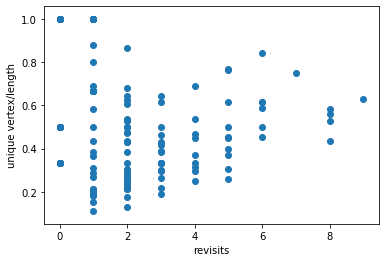

In [222]:
scatter(revisits,max_vert)
xlabel('revisits')
ylabel('unique vertex/length')

Text(0, 0.5, 'revisits')

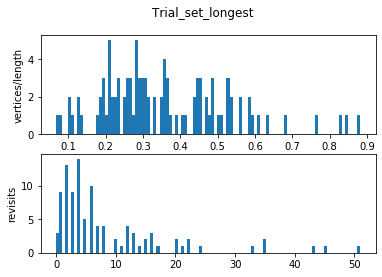

In [271]:
suptitle('Trial_set_longest')
subplot(211)
hist(max_vert,100)[2]
ylabel('vertices/length')
#yscale('log')
subplot(212)
hist(revisits,100)[2]
ylabel('revisits')


(0, 50)

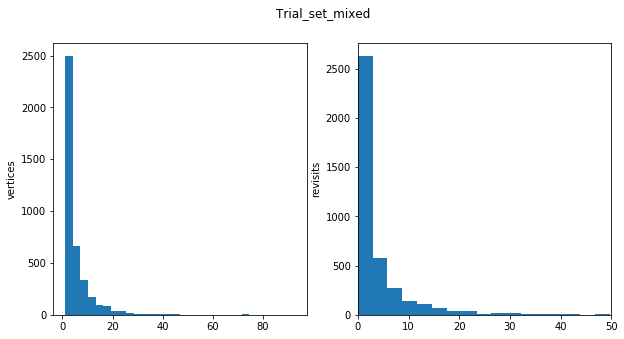

In [371]:
fig = figure(1)
fig.set_size_inches(10,5)
suptitle('Trial_set_mixed')
subplot(121)
hist(max_vert,30)[2]
ylabel('vertices')
#yscale('log')
subplot(122)
hist(revisits,80)[2]
ylabel('revisits')
xlim(0,50)

Text(0, 0.5, 'revisits')

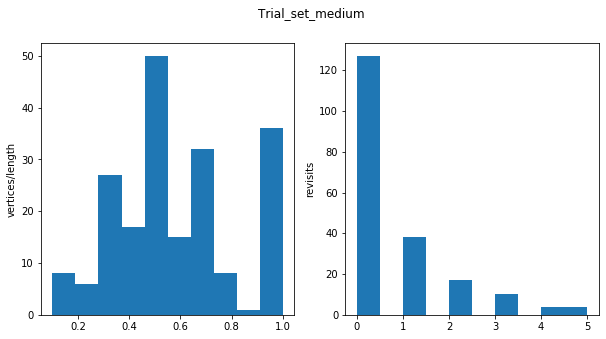

In [286]:
fig = figure(1)
fig.set_size_inches(10,5)
suptitle('Trial_set_medium')
subplot(121)
hist(max_vert,10)[2]
ylabel('vertices/length')
#yscale('log')
subplot(122)
hist(revisits,10)[2]
ylabel('revisits')


In [358]:
from pomegranate import *

In [359]:
model = GeneralMixtureModel([PoissonDistribution(1), PoissonDistribution(10)])

In [367]:
model.fit(array(revisits))

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "PoissonDistribution",
            "parameters" : [
                1.4133195129989262
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "PoissonDistribution",
            "parameters" : [
                20.003010970898618
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.85679696796786,
        0.14320303203214
    ]
}

(array([829.,  33.,   1.,   5.,  23.,  38.,  32.,  20.,  13.,   6.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

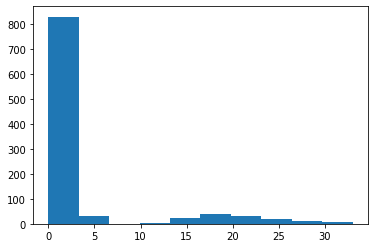

In [368]:
hist(model.sample(1000))

In [62]:
def ordered_set(arr):
    res=[]
    for i in arr:
        if i not in res:
            res.append(i)
    return(res)